In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Generate data


In [2]:
def generate_data(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m) * 5
    y = 3 * X + 2 + noise  # Linear relation with some noise
    return X, y

X, y = generate_data(100)
print(X)
print(y)

[ 16.07270481 -12.0141       3.25629901  13.02526094   1.75833529
  15.41686299  -6.98248752  -2.36050538  -5.79044512  -3.89653381
  -4.05232296   3.68282194 -14.57122707  -6.58151729   1.22644959
 -12.23383564 -12.43131636 -13.76859521  -1.94510519   1.19459148
  34.4935954    1.77581944   1.07819707 -17.83868218  -0.70882926
 -13.03405487  25.56191964   9.86619891  -0.10851033   8.76271146
  10.81207734   0.59962132  16.84447198 -10.65702432   1.20704619
  -7.47499482 -13.56328829  -5.29534646  23.72233688  13.78224243
 -12.2808279   -2.84394272 -19.0488435   12.4573752   11.23713458
   8.19602102   3.72846081  -6.27063225  -1.83108846  -3.40508748
  -1.07305703  11.86960898 -14.05025833 -12.73130458  -1.82835638
  -4.62141147  -2.70517864  14.2020864   -1.00987644  34.17975015
  11.68920361   3.55095088   6.99402299   9.07584791  11.68669168
  -9.30940985   4.28906748  -8.79063802 -11.94166565   2.31957609
  12.97521145  -1.61001231  -9.11823272  -4.2414846    2.02330122
   8.10630

### Normalise data

In [3]:
def normalise_data(X):
    mean = np.mean(X)
    std_dev = np.std(X)
    return (X - mean) / std_dev

### Plot Data

In [4]:
def plot_data(X,y,title="XvsY", xlabel="X", ylabel="y"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y, color='blue', label='Data points')
    plt.legend()
    plt.show()

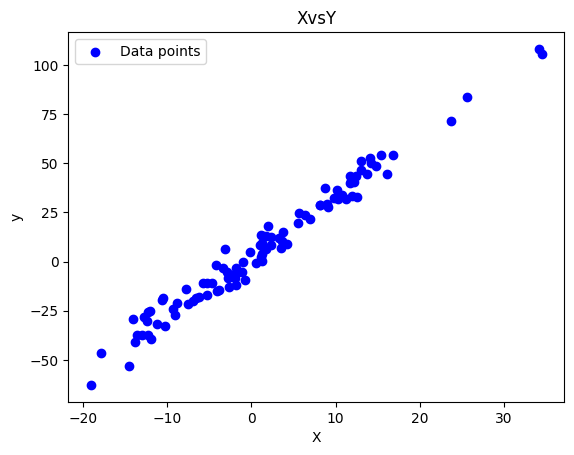

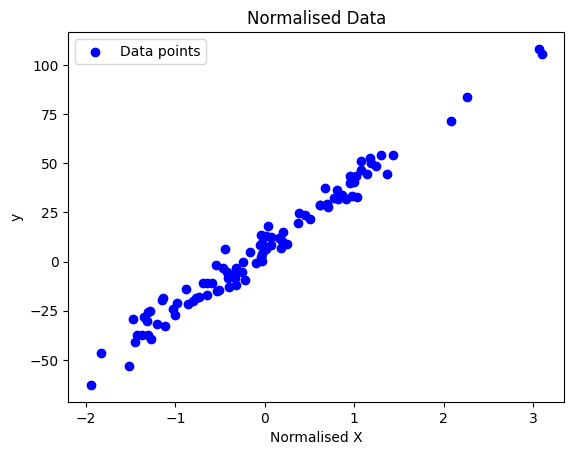

In [5]:
plot_data(X, y)
X =normalise_data(X)
plot_data(X, y, title="Normalised Data", xlabel="Normalised X", ylabel="y")

In [6]:
# Split data into training and testing sets
def train_test_split(X,y, split_ratio=0.8):
    m = X.shape[0]
    
    split = int(m * split_ratio)
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y

    XT = data[:split,0]
    yT = data[:split,1]
    Xt = data[split:,0]
    yt = data[split:,1]
    return XT, yT, Xt, yt

XT, yT, Xt, yt = train_test_split(X, y)

### Modeling

In [7]:
# Defining hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

In [8]:
# Cost / Loss function
def cost_function(X,y,theta):
    m = X.shape[0]
    e = 0
    
    for i in range(m):
        hypothesis_value = hypothesis(X[i], theta)
        e += (hypothesis_value - y[i])**2
    return e / (2*m)

In [9]:
# Gradients / slopes calculation
def gradients(X, y, theta):
    m = X.shape[0]
    grad = np.zeros_like(theta)
    
    for i in range(m):
        hypothesis_value = hypothesis(X[i], theta)
        error = hypothesis_value - y[i]
        grad[0] += error  # Gradient w.r.t. theta[0]
        grad[1] += error * X[i]  # Gradient w.r.t. theta[1]
    
    return grad / m

In [10]:
# train function
def train(X, y, learning_rate=0.01, iterations=1000):
    m = X.shape[0]
    theta = np.array([-150,100], dtype=np.float64)  # Initialize theta with two parameters
    cost_history = []
    theta_list = []
    for _ in range(iterations):
        grad = gradients(X, y, theta)
        theta_list.append((theta[0], theta[1]))
        theta -= learning_rate * grad  # Update theta
        
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history,theta_list

In [11]:
theta, cost_history,theta_list = train(XT,yT)
print("Trained parameters (theta):", theta)

Trained parameters (theta): [ 7.74190708 32.09313313]


In [12]:
# Prediction
def predict(X, theta):
    return hypothesis(X, theta)

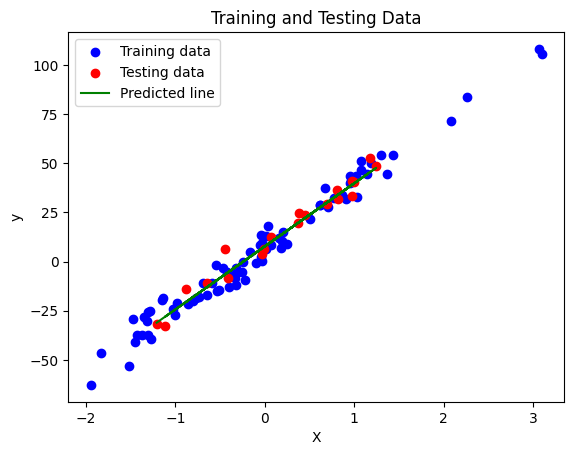

In [13]:
# Plot the data
plt.scatter(XT, yT, color='blue', label='Training data')
plt.scatter(Xt, yt, color='red', label='Testing data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Testing Data')
# Calculate y
y_pred = predict(Xt, theta)
plt.plot(Xt, y_pred, color='green', label='Predicted line')
plt.legend()
plt.show()

## R2 score

In [14]:
def r2_score(y, y_pred):
    y_mean = y.mean()
    numerator = np.sum((y - y_pred) ** 2)
    denominator = np.sum((y - y_mean) ** 2)
    return 1 - numerator / denominator

In [15]:
r2_score(yt,y_pred)

np.float64(0.9677479930963095)

In [16]:
y_pred.shape

(20,)

(27,)
(27,)


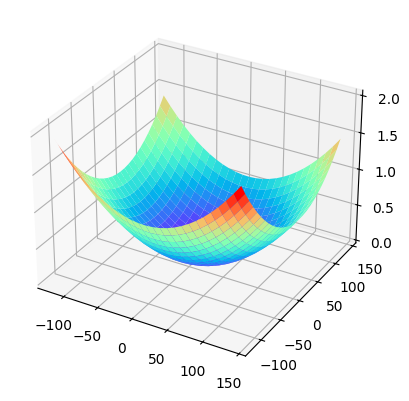

In [17]:
# Visualizes the training process
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)
print(T0.shape)
print(T1.shape)
T0,T1 = np.meshgrid(T1,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((yp - y)**2)/2*X.shape[0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()

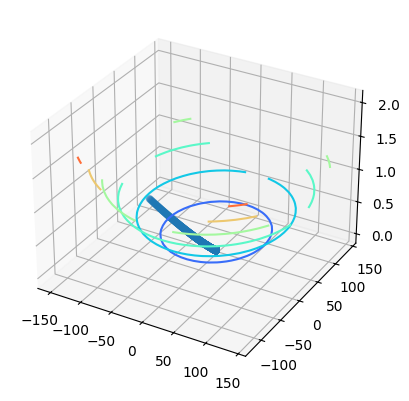

In [18]:
theta_list = np.array(theta_list)
fig,ax = plt.subplots(subplot_kw={"projection":'3d'})
ax.contour(T0,T1,J,cmap="rainbow")
ax.scatter(theta_list[:,0], theta_list[:,1], cost_history)
plt.show()